# **Tratamiento de Señal EMG**

In [497]:
#Importación de librerías
!pip install biosignalsnotebooks
!pip install h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from scipy import signal
from tqdm import tqdm
from IPython.display import display
import csv
import sympy
from scipy.fft import fft
import scipy.signal as signal
from math import log10
#Cargar Datos desde archivo h5
from h5py import File
# biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [498]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

## Cargar los datos del BiTalino

In [499]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("EMG gemelos.txt", delimiter="\t")
array1

array([[  0.,   0.,   0., ...,   0., 516.,  nan],
       [  1.,   0.,   0., ...,   0., 515.,  nan],
       [  2.,   0.,   0., ...,   0., 515.,  nan],
       ...,
       [  1.,   0.,   0., ...,   0., 508.,  nan],
       [  2.,   0.,   0., ...,   0., 508.,  nan],
       [  3.,   0.,   0., ...,   0., 508.,  nan]])

En la variable d_sensor se encuentra los datos del EMG

In [500]:
#Nos quedamos con el dato del sensor
d_sensor = array1[:,-2]
print(d_sensor)
len(d_sensor)

[516. 515. 515. ... 508. 508. 508.]


154500

### Graficación de los datos en el tiempo

[0.00000e+00 1.00000e-03 2.00000e-03 ... 1.54497e+02 1.54498e+02
 1.54499e+02]


(148000.0, 150000.0)

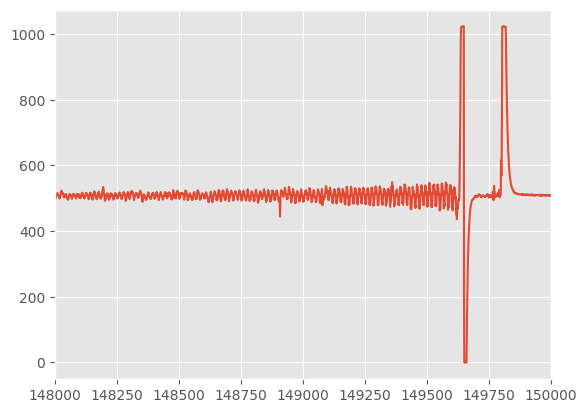

In [501]:
Fs = 1000 
Ts=1/Fs
n = np.arange(0,d_sensor.shape[0])  # t = n*Ts ; Ventor de numeros de datos
t = n*Ts #VECTOR TIEMPO 
print(t)
plt.plot(d_sensor)
plt.xlim(148000,150000)

Al momento de captar la señal, al rededor, despues de 150 segundos se desconectaron los electrodos aún cuando se estaba captando la señal en el BiTalino, por lo que se eliminará la señal despues de ese tiempo

####Señal Cortada

[0.00000e+00 1.00000e-03 2.00000e-03 ... 1.47997e+02 1.47998e+02
 1.47999e+02]


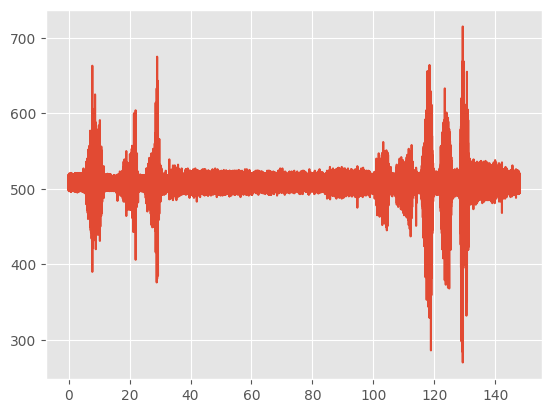

In [502]:
d_sensor=d_sensor[:148000] #Actualizando los sensores
Fs = 1000 
Ts=1/Fs
n = np.arange(0,d_sensor.shape[0])  # t = n*Ts ; Ventor de numeros de datos
t = n*Ts #VECTOR TIEMPO 
print(t)
plt.plot(t,d_sensor)

###Graficando los Datos en el Espectro de Frecuencias

EMG, desde 0.05-100 Hz

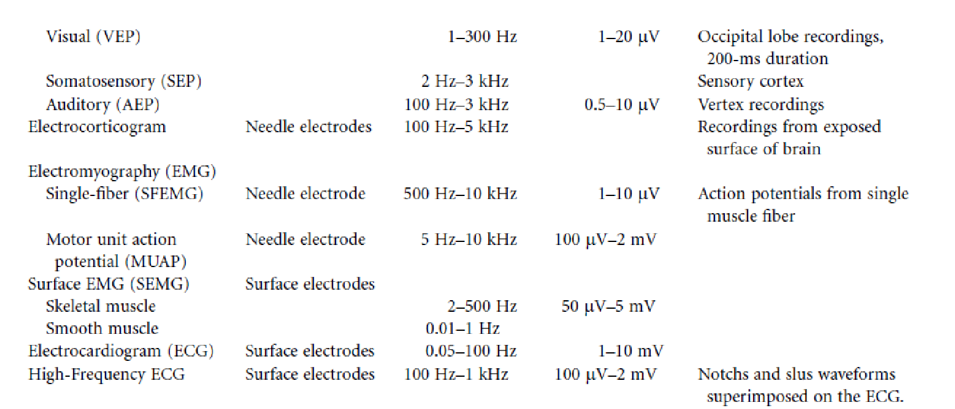

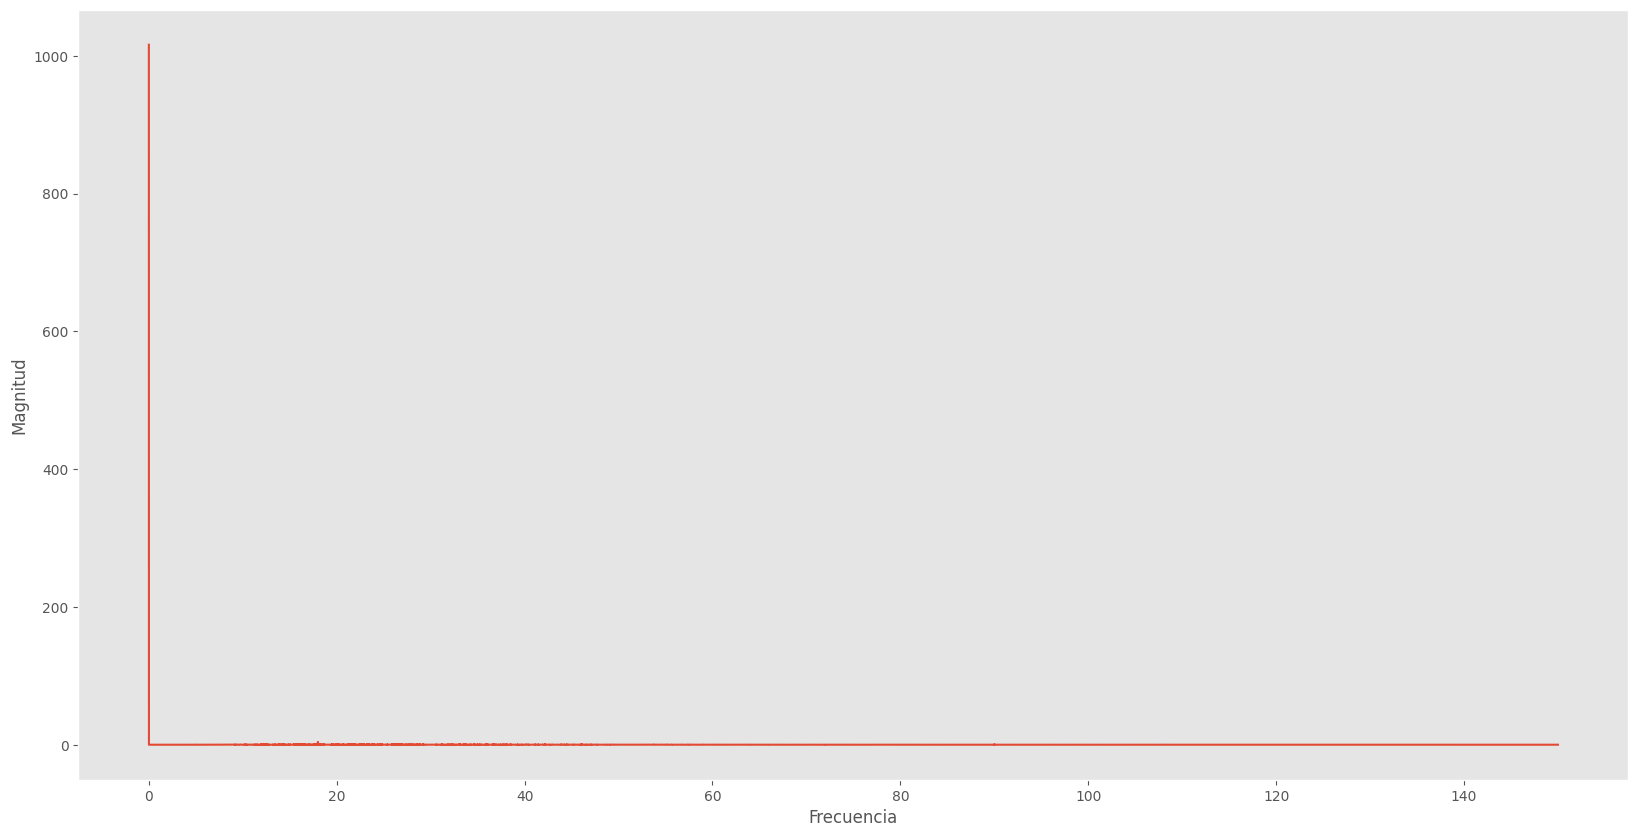

In [503]:
# Analizar el Fourier
emg_senal = d_sensor
# Periodo de 1ms (0.001s) o frecuencia de 1000 Hz
T = 1/300 #Ver hasta 150 Hz
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.show()

####Graficando los datos en un rango de Frecuencias de 0.5-100 Hz

Se observa un pico muy pronunciado en 0 Hz, Por ello se ubicará el grafico después de 1 Hz para analizar los picos de la gráfica restante.

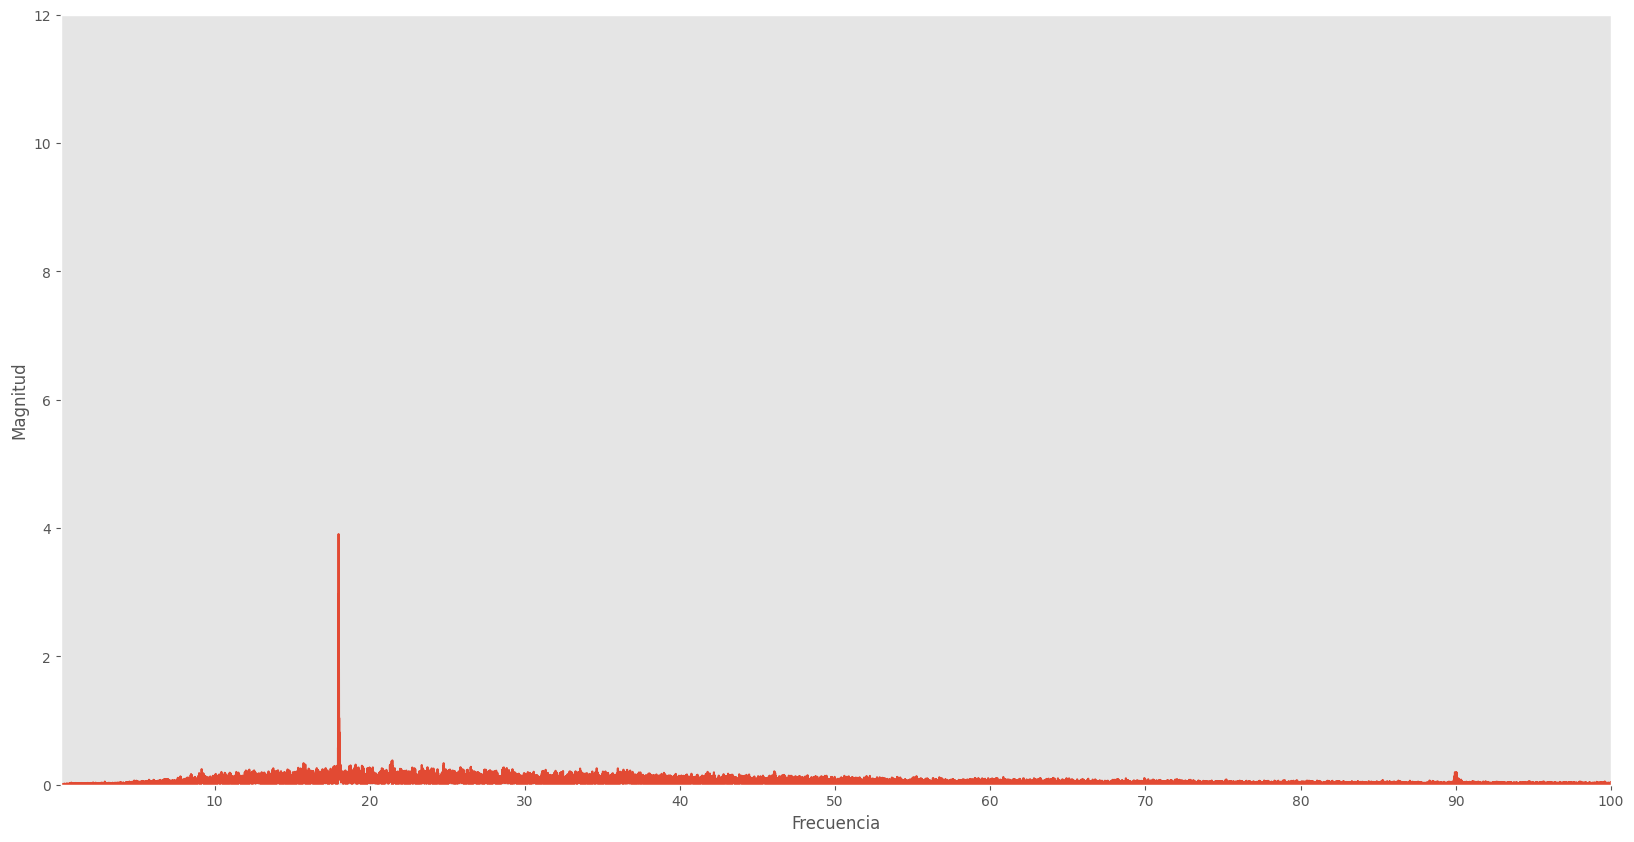

In [504]:
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
ticks = np.arange(0, 510, 10)
plt.xticks(ticks)
plt.xlabel("Frecuencia")
plt.xlim(0.1,100)
plt.ylim(0,12)
plt.ylabel("Magnitud")
plt.show()

##Detección de Eventos


In [505]:
from scipy.signal import butter, lfilter
from scipy.stats import linregress


###Eliminar Línea Base

In [506]:
#Eliminación de línea base
pre_pro_signal= emg_senal - np.average(emg_senal)


###Filtrando Señal

In [507]:
#Filtrado
low_cutoff= 10 # Hz
high_cutoff= 300 # Hz
sr=Fs
pre_pro_signal=bsnb.aux_functions._butter_bandpass_filter(pre_pro_signal,low_cutoff,high_cutoff,sr)

####Ver señal filtrada

#####**Tiempo**

[0.00000e+00 1.00000e-03 2.00000e-03 ... 1.47997e+02 1.47998e+02
 1.47999e+02]


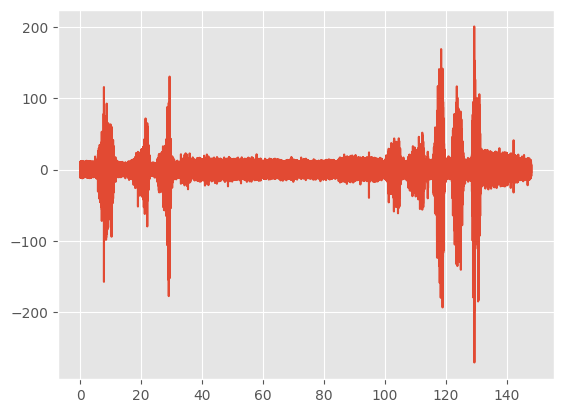

In [508]:
print(t)
plt.plot(t,pre_pro_signal)

Comparando pre/post

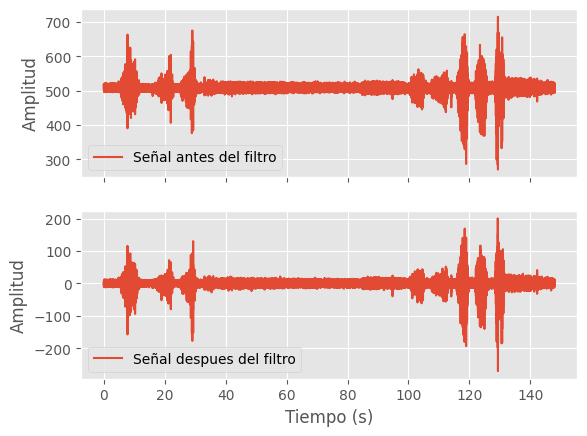

In [509]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Graficar el primer gráfico
ax1.plot(t,d_sensor, label='Señal antes del filtro')
ax1.set_ylabel('Amplitud')
ax1.legend()

# Graficar el segundo gráfico
ax2.plot(t,pre_pro_signal, label='Señal despues del filtro')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud')
ax2.legend()

# Mostrar la figura
plt.show()

#####Frecuencia

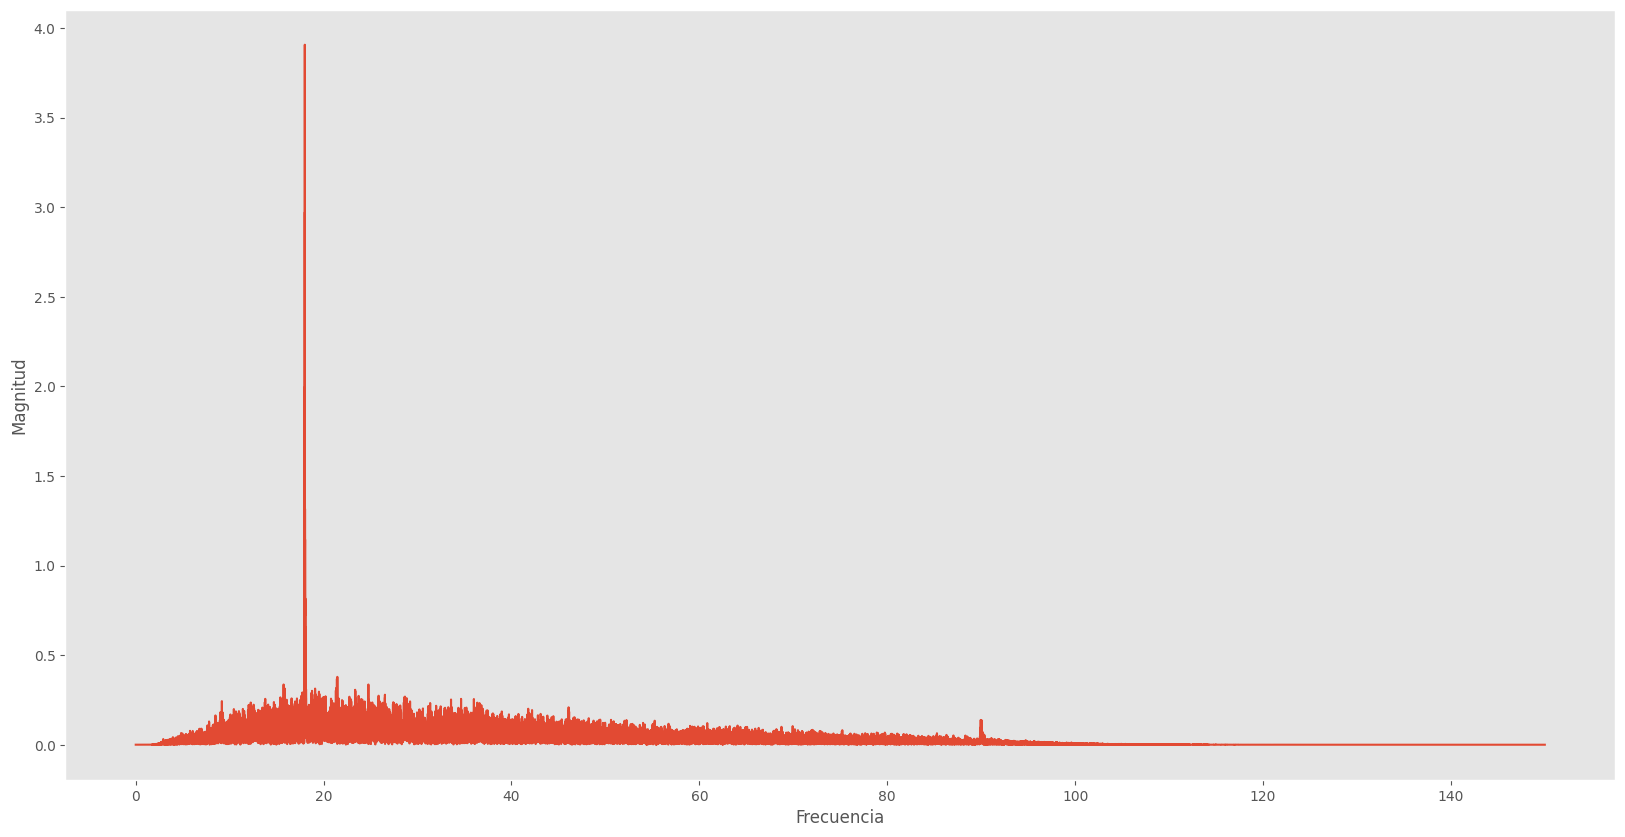

In [510]:
# Analizar el Fourier
# Periodo de 1ms (0.001s) o frecuencia de 1000 Hz
T = 1/300 #Ver hasta 150 Hz
N = len(pre_pro_signal)
yf_pro = fft(pre_pro_signal)
xf_pro = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,10))
plt.plot(xf_pro, 2.0/N * np.abs(yf_pro[0:N//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.show()

comparando pre/post

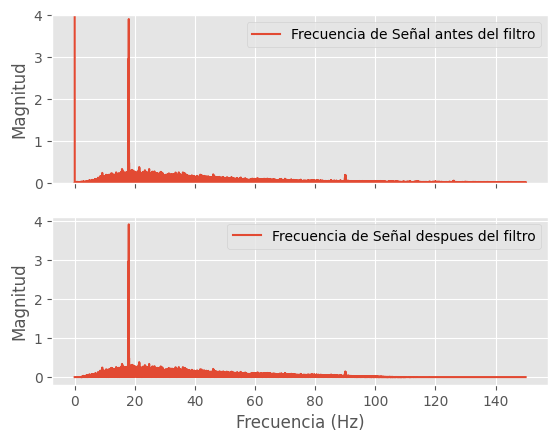

In [511]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Graficar el primer gráfico
ax1.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label='Frecuencia de Señal antes del filtro')
#ax1.set_xlim(0,50)
ax1.set_ylim(0,4)
ax1.set_ylabel('Magnitud')
ax1.legend()

# Graficar el segundo gráfico
ax2.plot(xf_pro, 2.0/N * np.abs(yf_pro[0:N//2]), label='Frecuencia de Señal despues del filtro')
#ax2.set_xlim(0.1,100)
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Magnitud')
ax2.legend()

# Mostrar la figura
plt.show()

###Umbral

6.93638550773533e-05
12.692695664035188


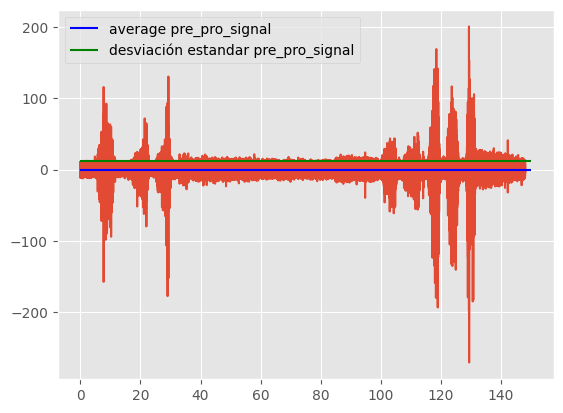

In [512]:
#Umbral
avg_pre_pro_signal=np.average(pre_pro_signal)
std_pre_pro_signal= np.std(pre_pro_signal)
print(avg_pre_pro_signal)
print(std_pre_pro_signal)
plt.figure(1)
plt.plot(t,pre_pro_signal)
plt.hlines(avg_pre_pro_signal,0,150,"b", label='average pre_pro_signal')
plt.hlines(std_pre_pro_signal,0,150,"g",label='desviación estandar pre_pro_signal')
plt.legend()

threshold_10 :
 16.11052168583684
threshold_80 :
 2.013875904102798


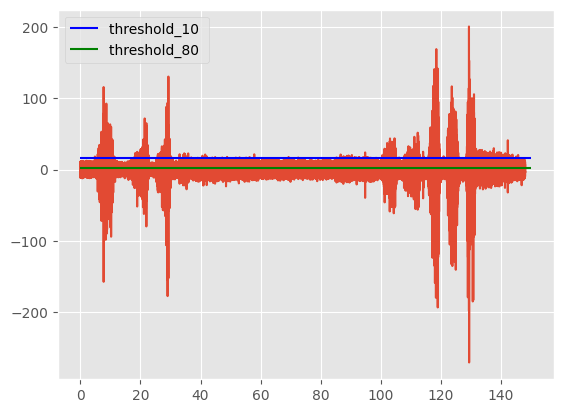

In [513]:
def normReg(max_voluntary_contraction):
    #normReg es normalización por referencia a una contracción máxima voluntaria
    return std_pre_pro_signal / max_voluntary_contraction
#Umbrales extremos
threshold_level=10
threshold_level_norm_10= normReg(threshold_level)
threshold_level=80
threshold_level_norm_80= normReg(threshold_level)

threshold_10 = avg_pre_pro_signal +threshold_level_norm_10* std_pre_pro_signal
threshold_80 = avg_pre_pro_signal +threshold_level_norm_80* std_pre_pro_signal
print("threshold_10 :\n",threshold_10)
print("threshold_80 :\n",threshold_80)
#print(len(threshold_10),len(emg_senal))

plt.figure(2)
plt.plot(t,pre_pro_signal)
plt.hlines(threshold_10 ,0,150,"b", label='threshold_10 ')
plt.hlines(threshold_80 ,0,150,"g",label='threshold_80 ')
plt.legend()

Restando la señal basal

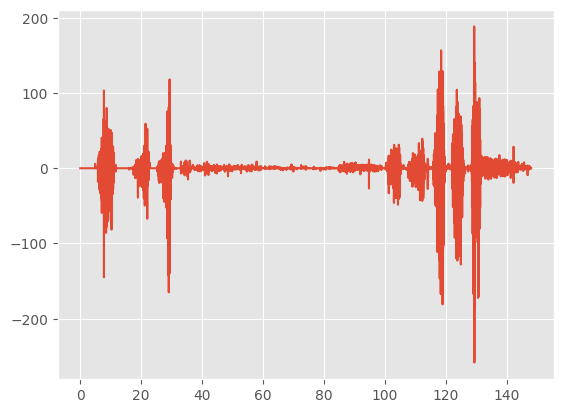

In [514]:
smooth_signal=pre_pro_signal
for i in range(0,len(emg_senal )):
  if pre_pro_signal[i] > 0:
    smooth_signal[i]=pre_pro_signal[i] - std_pre_pro_signal
    if smooth_signal[i]<0:
      smooth_signal[i]=0
  else:
    smooth_signal[i]=pre_pro_signal[i] + std_pre_pro_signal
    if smooth_signal[i]>0:
      smooth_signal[i]=0
plt.figure(3)
plt.plot(t,smooth_signal)

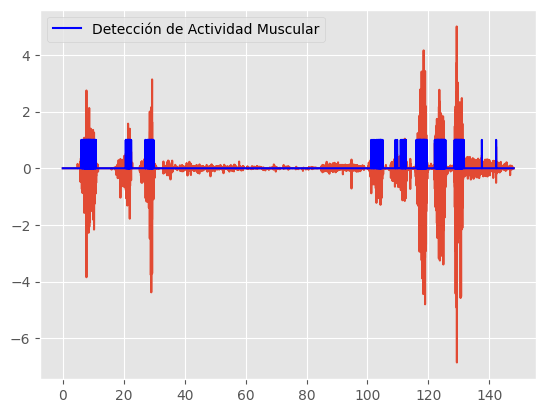

In [524]:
#Onda cuadrada segun Los periodos de activación
binary_signal=[]
for i in range(0,len(emg_senal )):
  if smooth_signal[i]>=threshold_10:
    binary_signal.append(1)
  else:
    binary_signal.append(0)
plt.figure(3)
plt.plot(t,5*(smooth_signal ) / (np.max(smooth_signal))) #Normalizando
plt.plot(t,binary_signal,"b", label='Detección de Actividad Muscular')
plt.legend()

##Extracción de Características

Se detecta el evento mediante un código

In [522]:
#Muestreo y frecuencias
burst_begin, burst_end=bsnb.detect_emg_activations(d_sensor,Fs,smooth_level=20,threshold_level=10,time_units=True,plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

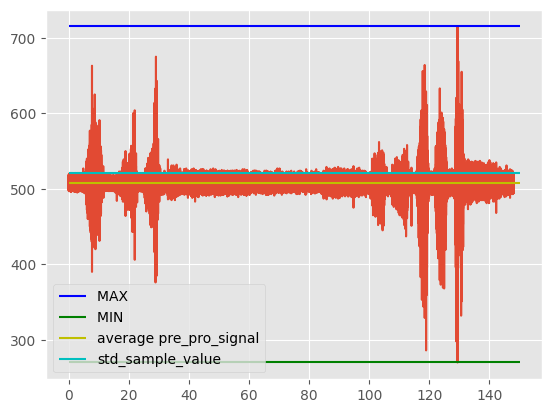

In [557]:
# Máxüro
max_sample_value= max(d_sensor)
# Mínimo
min_sample_value = min(d_sensor)
# Promedio y desviación estandar
avg_sample_value = np.average(d_sensor)
std_sample_value = np.std(d_sensor)

time_param_dict={"Maximum EMG" :max_sample_value,"Minimum EMG": min_sample_value,
                 "Average EMG":avg_sample_value,"Standard Deviation EMG": std_sample_value}
plt.figure(4)
plt.plot(t,d_sensor)
plt.hlines(max_sample_value ,0,150,"b", label='MAX ')
plt.hlines(min_sample_value ,0,150,"g",label='MIN ')
plt.hlines(avg_sample_value,0,150,"y", label='average pre_pro_signal')
plt.hlines(std_sample_value+avg_sample_value,0,150,"c",label='std_sample_value')
plt.legend()

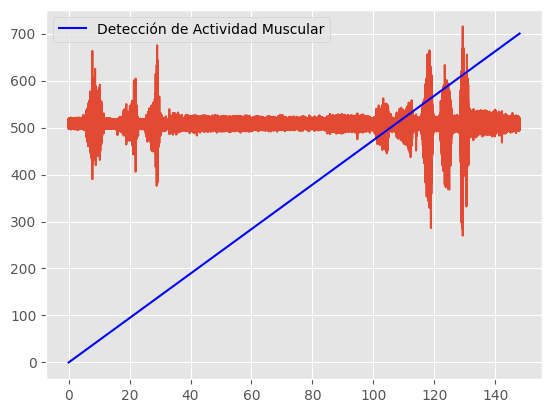

In [555]:
from scipy.integrate import cumtrapz
#Root Mean Square
rms=np.sqrt(sum(d_sensor*d_sensor)/len(d_sensor))

#Área Bajo la curva
area=cumtrapz(d_sensor)

plt.figure(5)
plt.plot(t[:148000-1],d_sensor[:148000-1])
plt.plot(t[:148000-1],700*area/max(area),"b", label='Detección de Actividad Muscular')
plt.legend()

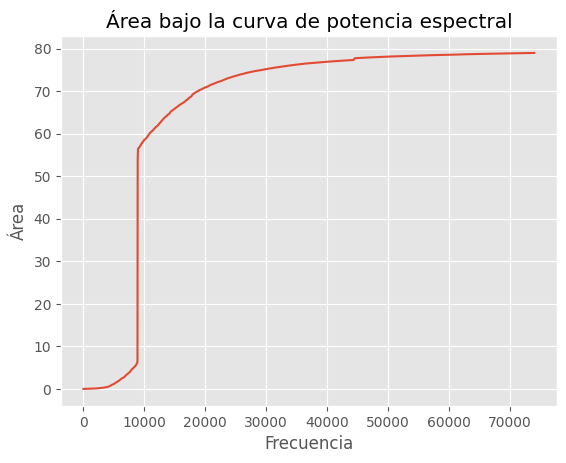

In [540]:
from scipy.integrate import cumtrapz
# Generar la ventana de Hanning
window = np.hanning(len(d_sensor))

# Potencia espectral de la señal
f, P = welch(d_sensor, fs=Fs, window=window, nperseg=len(d_sensor), noverlap=0, nfft=len(d_sensor))

# Área bajo la curva de potencia espectral
area_freq = cumtrapz(P, f, initial=0)

# Graficar el resultado
plt.plot(area_freq)
plt.xlabel('Frecuencia')
plt.ylabel('Área')
plt.title('Área bajo la curva de potencia espectral')
plt.show()

In [543]:
total_power = area_freq[-1]
median_freq = f[np.where(area_freq >=total_power / 2)[0][0]]
f_max = f[np.argmax(P)]